# Part II - Trip Data Characteristics and their Duration in the FordGoBike-2019 dataset
## by LongTH

## Investigation Overview

This report will analyze the Ford GoBike's trip data for public that containing bike rides from April FY2019. In concrete, it will look at the biking duration, the starting time (weekday, hour), and the users type and user age, which are features that can be used to analyze or predict the duration later on.

## Dataset Overview

The dataset orginally consists of 183,412 row (records) and 16 columns. All columns/features contain information about user, trip and station. The cleaning and preprocessing steps include remove missing value and duplicates to ensure the quality, and filter out outliers in some features. 

In [ ]:
# import all packages and set plots to be embedded inline
!pip install geopy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy import distance

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [15]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [ ]:
# Preprocessing the data
# Filter out the rows that missing any value and duplicates
df = df.dropna().drop_duplicates()

# change the data type for start and end time to be datetime64[ns] and extract day of weeks and hour from start time
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df["start_time_dow"] = df["start_time"].dt.dayofweek
df["start_time_dow"] = df["start_time_dow"].map({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})
df["start_time_hour"] = df["start_time"].dt.hour

# Filter age outliers
df["member_age"] = 2019 - df["member_birth_year"]
df = df[df["member_age"] <= 73]

# Filter distance outliers
def calculate_distance_km(row):
    start_point = (row["start_station_latitude"], row["start_station_longitude"])
    end_point = (row["end_station_latitude"], row["end_station_longitude"])
    return distance.distance(start_point, end_point).km

df["distance_km"] = df.apply(calculate_distance_km, axis=1)
df = df[(df["distance_km"] >= 0.1) & (df["distance_km"] <= 20)]

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dow,start_time_hour,member_age,distance_km
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17,35.0,0.543983
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12,47.0,2.705390
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17,30.0,0.260896
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23,45.0,2.412017
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Thursday,23,60.0,3.328256


## User type and their trip duration

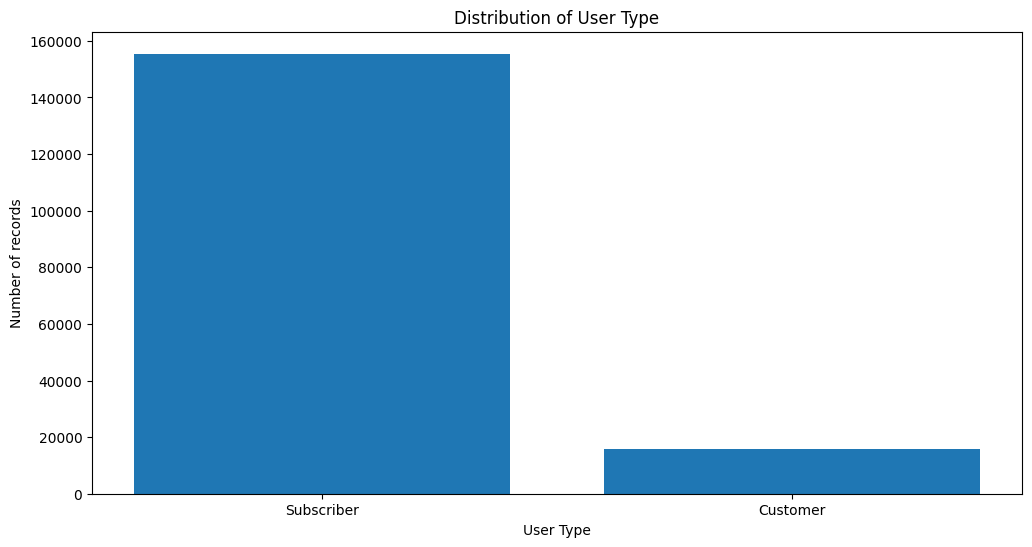

In [7]:
# plotting types of users 
plt.figure(figsize=(12, 6))
plt.bar(x = df["user_type"].value_counts().keys(), height = df["user_type"].value_counts())
plt.title('Distribution of User Type')
plt.xlabel('User Type')
plt.ylabel('Number of records')
plt.show()

Most of the records in the dataset are from subcribers. 

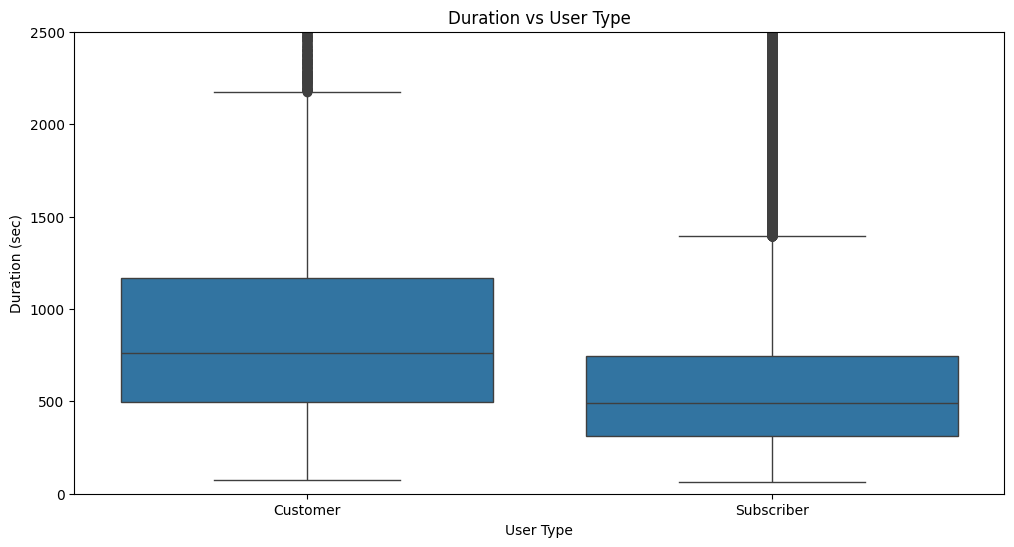

In [8]:
# Duration vs User Type
plt.figure(figsize=(12, 6))
sns.boxplot(df, x="user_type", y="duration_sec")
plt.xlabel("User Type")
plt.ylim((0, 2500)) # Limit the y-axis to 2500 seconds to have a better view
plt.ylabel("Duration (sec)")
plt.title("Duration vs User Type")
plt.show()

However, the duration of Customers' trips are likely to be longer than that of Subcribers

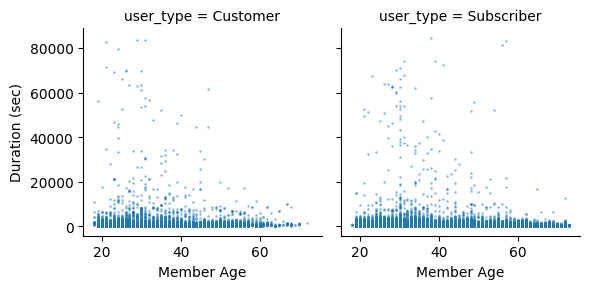

In [18]:
g = sns.FacetGrid(data = df, col = 'user_type')
g.map(plt.scatter, 'member_age', 'duration_sec', alpha=0.35, s=1)
g.set_xlabels('Member Age')
g.set_ylabels('Duration (sec)')
# plt.yscale('log')
plt.show()

The main thing I want to show from this plot is that old age riders from Subcriber tend to have longer trip than old age riders that are Customer

## User age and their trip duration

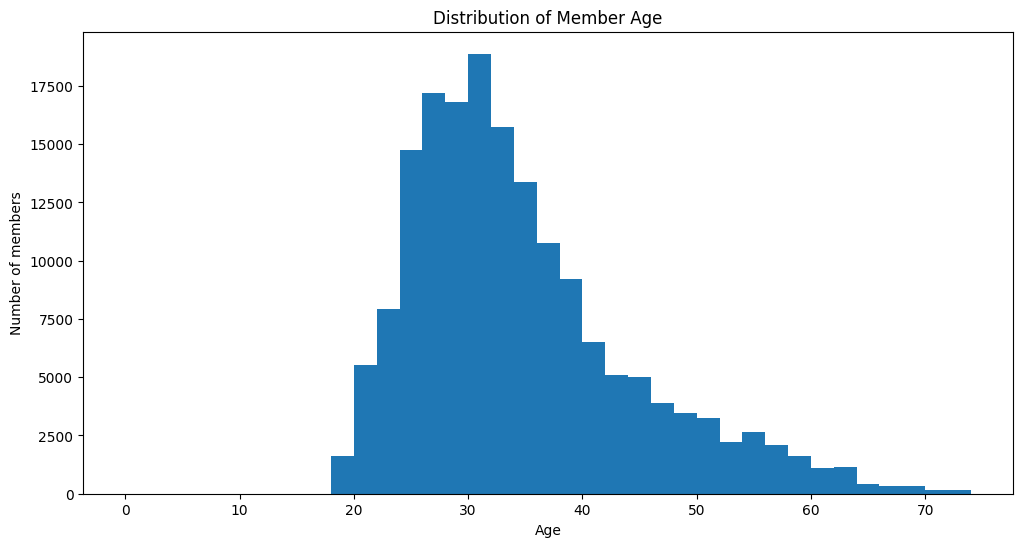

In [13]:
bin_size = 2
bins = np.arange(0, df['member_age'].max() + bin_size, bin_size)
plt.figure(figsize=(12, 6))
plt.hist(data=df, x='member_age', bins=bins)
plt.xlabel('Age')   
plt.ylabel('Number of members')
plt.title('Distribution of Member Age')
plt.show()

The majority of cycling members in the dataset records are around 20-40 years old

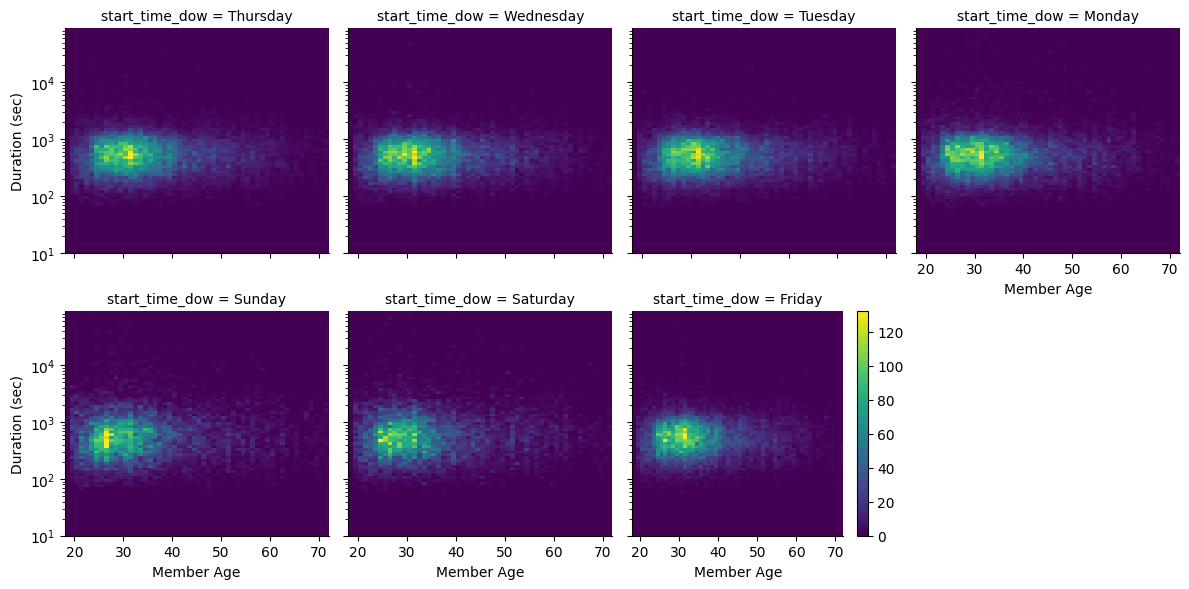

In [17]:
def hist2d_duration_age(x, y, **kwargs):
    cmap = kwargs.pop('cmap', None)
    member_age_bins = np.arange(df["member_age"].min(), df["member_age"].max(), 1)
    duration_sec_bins = 10 ** np.arange(np.floor(np.log10(df["duration_sec"]).min()), np.log10(df["duration_sec"]).max() + 0.05, 0.05)
    plt.hist2d(x, y, bins=[member_age_bins, duration_sec_bins], cmap = cmap)
    plt.yscale('log')

g = sns.FacetGrid(data=df, col='start_time_dow', col_wrap=4)
g.map(hist2d_duration_age, 'member_age', 'duration_sec', cmap=None)
plt.colorbar()
g.set_xlabels('Member Age')
g.set_ylabels('Duration (sec)')

There are more younger riders (with age < 45) that rent bikes in all days of week. 
Younger riders tend to have longer trip than older riders

Moreover, the cycling duration at weekend is longer than in the weekdays